<a href="https://colab.research.google.com/github/nishaalajmera/Titanic-Survival-Prediction/blob/main/TitaticSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Prediction**
### Nishaal Ramesh Ajmera



# Introduction

In 1912, the RMS Titanic sank after colliding with an iceberg. This resulted in an unfortunate death of 1502 out of 2224 passengers and crew due to lack of lifeboats for everyone onboard. 

It was suggested that some groups of people were more likely to survive than others. Therefore, this analysis aims to predict what groups were more likely to survive using Machine Learning models. 



In [ ]:
# @title Importing relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


## Data Understanding 

In [ ]:
# Loading the train and test set
url = 'https://raw.githubusercontent.com/nishaalajmera/Titanic-Survival-Prediction/main/train.csv'
trainset = pd.read_csv(url)
url2= 'https://raw.githubusercontent.com/nishaalajmera/Titanic-Survival-Prediction/main/testdata_with_groundTruth.csv'
testset = pd.read_csv(url2)


In [ ]:
# Inspecting data
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#@title Rows and columns 
# Inspecting the total number of rows and columns 
print("Total number of rows for training set:", trainset.shape[0])
print("Total number of columns in training set:", trainset.shape[1])
print("Total number of rows for test set:", testset.shape[0])
print("Total number of columns for test set;",testset.shape[1])

Total number of rows for training set: 891
Total number of columns in training set: 12
Total number of rows for test set: 418
Total number of columns for test set; 12


The datasets show 11 features that could be use to predict the survival of passengers

## Exploratory Data Analysis 

In [ ]:
trainset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print("Number of passengers survived")
len(trainset[trainset.Survived==1])

Number of passengers survived


342

Text(0.5, 1.0, 'Survived')

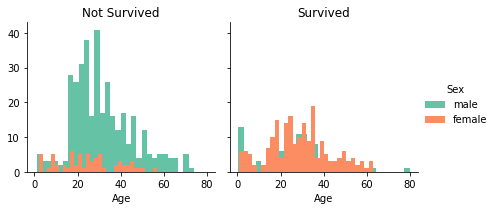

In [ ]:
#@title Histograms showing survival by age and sex
g = sns.FacetGrid(trainset, col='Survived',hue='Sex',palette='Set2')
g.map(plt.hist, 'Age',bins=30)
axes = g.axes.flatten()
g.add_legend()
axes[0].set_title("Not Survived")
axes[1].set_title("Survived")



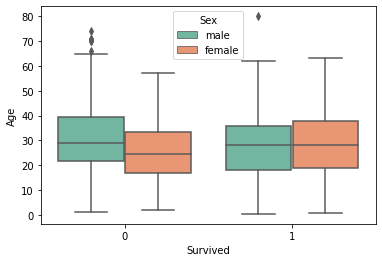

In [ ]:
#@title Boxplot of survival by Age and Sex
sns.boxplot(x='Survived',y='Age', hue='Sex', data=trainset, palette='Set2')

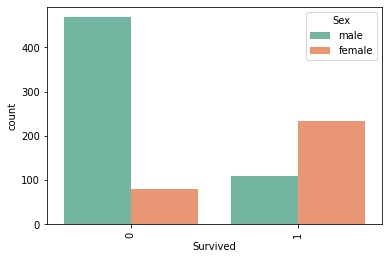

In [ ]:
# @title Bar chart of Survival count by Sex
sns.countplot(x='Survived', hue='Sex', data=trainset, palette='Set2')
plt.xticks(rotation=90)
plt.show()

It is observed that generally more females were likely to survive then males. At large, the number of people surviving were much less than those who did not. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


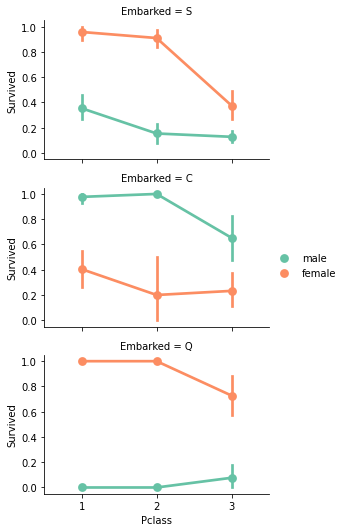

In [ ]:
#@title Plots showing probability of survival by Pclass, Sex and Embarkation port
g = sns.FacetGrid(trainset, row='Embarked', height=2.5, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Set2')
g.add_legend()



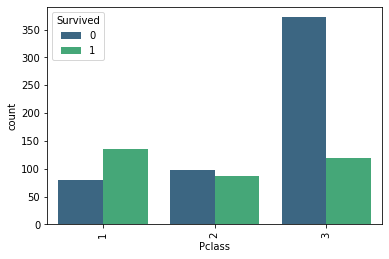

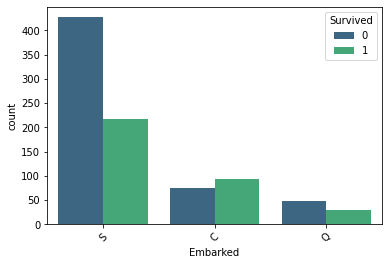

In [ ]:
#@title Plots showing survival count by Pclass and Embarkation port
sns.countplot(x='Pclass', hue='Survived', data=trainset, palette='viridis')
plt.xticks(rotation=90)
plt.show()
sns.countplot(x='Embarked', data=trainset, palette='viridis', hue='Survived')
plt.xticks(rotation=45)
plt.show()

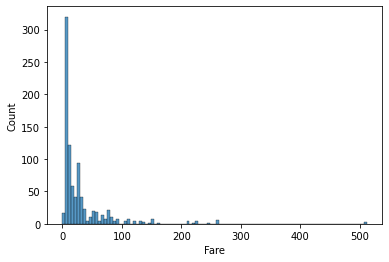

In [ ]:
#@title Distribution count of Fare
sns.histplot(data=trainset['Fare'])

# Methods

### Data Cleaning
The missing values in the data is inspected


In [ ]:
trainset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 It is suggested that `Cabin` will not contribute to the prediction of survival and it has 687 missing values so it has been dropped.  The other features that are dropped are also thought to not contribute to the survival chances of a passenger. 

In [ ]:
trainset = trainset.drop (['PassengerId','Ticket','Cabin'], axis=1)
testset = testset.drop (['PassengerId','Ticket','Cabin'], axis=1)

Feature engineering is performed on `Embarked` column

In [ ]:
trainset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
top_letter = 'S' 
df = [trainset, testset]

for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna(top_letter)

Creating new feature to extract `Title` from `Name` 




In [ ]:
trainset['Title'] = trainset['Name'].str.extract('([A-Za-z]+)\.', expand=True)
testset['Title'] = testset['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [ ]:
trainset.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Jonkheer      1
Ms            1
Mme           1
Lady          1
Countess      1
Sir           1
Capt          1
Name: Title, dtype: int64

Translations of Mr and Mrs are changed accordingly. Rare titles that might denote class in society or civilian awards are grouped as `Rare`

In [ ]:
# chaging rare titles 
mapping = { 'Major': 'Mr', 'Mlle':'Miss','Col': 'Rare', 'Sir': 'Rare','Countess': 'Rare',
           'Mme': 'Mrs','Lady': 'Mrs', 'Capt': 'Rare', 'Don': 'Mr',
           'Jonkheer': 'Rare', 'Ms': 'Miss', 'Dona': 'Mrs','Dr':'Rare','Rev':'Rare'}

for dataset in df:
    dataset.replace({'Title': mapping}, inplace=True)

The `Age` column has 177 missing values. If these rows are eliminated that will be substantial loss for the dataset keeping in mind that the total rows are 891. Therefore, the rationale that `Title` might give an indication of a passengers `Age` can be used to fill the missing `Age` values. 

In [ ]:
# fill in missing Age using median of Title groups
for dataset in df:
    agebytitle = dict(dataset.groupby('Title')['Age'].median())
    #median age column
    dataset['Med_Age'] = dataset['Title'].apply(lambda x: agebytitle[x])
    # replace all missing ages with the value in this column
    dataset['Age'].fillna(dataset['Med_Age'], inplace=True, )
    del dataset['Med_Age']

Binning method will be used to encode the `Age` into 6 bins.  This will an idea of the magnitude of the age grouping

In [ ]:
trainset['Grouped_Age']=pd.cut(trainset['Age'],
                              bins=[-np.inf,12,21,30,40,65,np.inf],
                              labels=[0,1,2,3,4,5]
)
testset['Grouped_Age']=pd.cut(testset['Age'],
                              bins=[-np.inf,12,21,30,40,65,np.inf],
                              labels=[0,1,2,3,4,5]
)

Convert to integers

In [ ]:
df = [trainset, testset]

for dataset in df:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Grouped_Age'] = dataset['Grouped_Age'].astype(int)

One Hot encoding is used for the `Embarked` feature to give equal importance to each port 

In [ ]:
trainset= pd.get_dummies(trainset,columns=['Embarked'],prefix='Embarked')
testset= pd.get_dummies(testset,columns=['Embarked'],prefix='Embarked')

The `Sex` feature will be dummy encoded to give equal importance to each sex and to avoid multicollinearity




In [ ]:
trainset= pd.get_dummies(trainset,columns=['Sex'],drop_first=True,prefix='S')
testset= pd.get_dummies(testset,columns=['Sex'],drop_first=True,prefix='S')

In [ ]:
trainset= pd.get_dummies(trainset,columns=['Title'],drop_first=True,prefix='T')
testset= pd.get_dummies(testset,columns=['Title'],drop_first=True,prefix='T')

The extra features that might not be useful for model training are dropped

In [ ]:
trainset = trainset.drop (['Name','Age'], axis=1)
testset = testset.drop (['Name','Age'], axis=1)
trainset.head()

,Survived,Pclass,SibSp,Parch,Fare,Grouped_Age,Embarked_C,Embarked_Q,Embarked_S,S_male,T_Miss,T_Mr,T_Mrs,T_Rare
0,0,3,1,0,7,2,0,0,1,1,0,1,0,0
1,1,1,1,0,71,3,1,0,0,0,0,0,1,0
2,1,3,0,0,7,2,0,0,1,0,1,0,0,0
3,1,1,1,0,53,3,0,0,1,0,0,0,1,0
4,0,3,0,0,8,3,0,0,1,1,0,1,0,0


Splitting variables for model training 

In [ ]:
X_train = trainset.drop (['Survived'], axis=1)
Y_train = trainset['Survived']

In [ ]:
X_test = testset.drop (['Survived'], axis=1)
Y_test = testset['Survived']

# Classification Models 

### 1. Logistic Regression with Cross Validation 

In [ ]:
from sklearn.model_selection import GridSearchCV
print('cross validation')
# try to find the optimal hyper-parameter by cross-validation
parameters = [{'C': [1,10, 100, 1000]}]
print("# Tuning hyper-parameter")
clf = GridSearchCV(LogisticRegression(max_iter=1000), parameters, cv=5)
clf.fit(X_train, Y_train)


print('best parameters:')
print(clf.best_params_)
print('-------------------------------------')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

cross validation
# Tuning hyper-parameter
best parameters:
{'C': 1}
-------------------------------------
0.825 (+/-0.043) for {'C': 1}
0.820 (+/-0.054) for {'C': 10}
0.819 (+/-0.050) for {'C': 100}
0.819 (+/-0.050) for {'C': 1000}


In [ ]:
optimal_C=1
clf = LogisticRegression(C=optimal_C,max_iter=1000,penalty='l2').fit(X_train,Y_train)

In [ ]:
accuracy_score(Y_test, clf.predict(X_test))

0.777511961722488

In [ ]:
def plot_coefficients(classifier, feature_names, clf_id, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(15, 5))
    plt.title(clf_id)
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
# for tree-based classifier's feature importance plotting
def plot_keyFeat_trees(classifier, feature_names, clf_id, top_features=10):
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    indices_vis = indices[:top_features]
    
    plt.figure()
    plt.figure(figsize=(15, 5))
    plt.title(clf_id)
    plt.bar(range(top_features), importances[indices_vis],
       color="r", align="center")
    plt.xticks(range(top_features), indices)
    plt.xlim([-1, top_features])
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, top_features), feature_names[indices_vis], rotation=60, ha='right')
    plt.show()

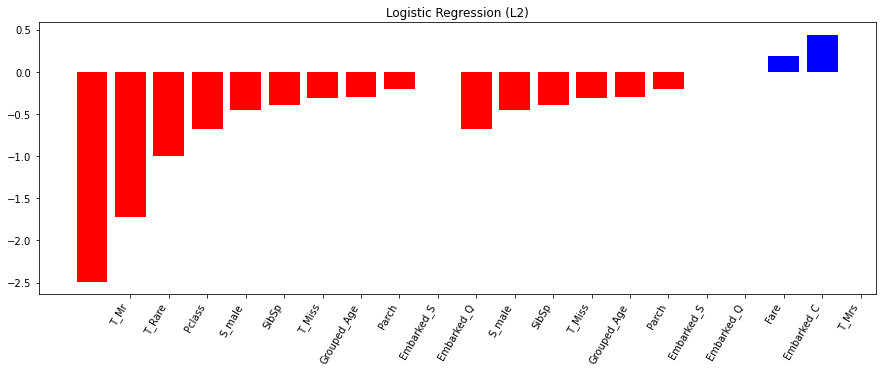

In [ ]:
X_names= list(X_train.columns.values) 
plot_coefficients(clf,X_names,'Logistic Regression (L2)')

### 2. Naive Bayes Classifier 


In [ ]:
NB = GaussianNB().fit(X_train, Y_train)

# Make predictions
y_pred = NB.predict(X_test)

# Evaluate accuracy
print('Naive Bayesian (Gaussian) classifier accuracy:',accuracy_score(Y_test, y_pred))


Naive Bayesian (Gaussian) classifier accuracy: 0.7535885167464115


In [ ]:
from sklearn import tree
DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
y_pred = DT.predict(X_test)

# Evaluate accuracy
print('Decision tree accuracy:',accuracy_score(Y_test, y_pred))


Decision tree accuracy: 0.7559808612440191


decision tree accuracy: 0.7559808612440191


<Figure size 432x288 with 0 Axes>

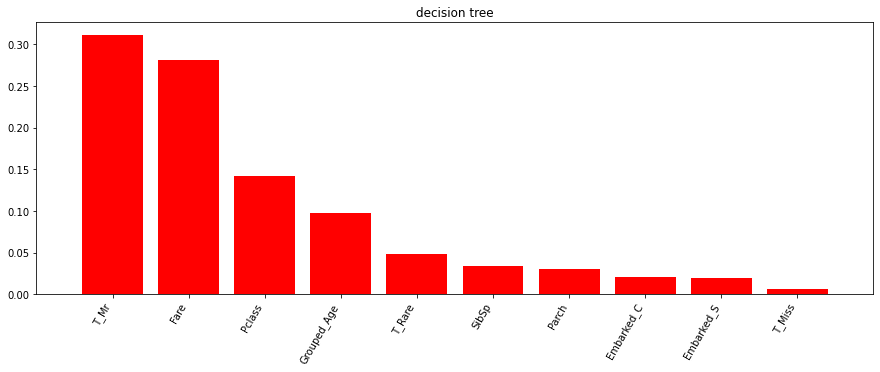

In [ ]:
print('decision tree accuracy:',accuracy_score(Y_test, DT.predict(X_test)))
plot_keyFeat_trees(DT, X_names, 'decision tree', top_features=10)

In [ ]:
# Cross validation to select hyper_parameters
n_estimators=[10,100,1000]
max_depth=[None,5,10,20]
param_grid= dict(n_estimators=n_estimators,max_depth=max_depth)

Cv specifies cross-validation fold (5-fold here)
n_jobs=-1 allows the code to run in parallel on all cores available except 1 

### 3. Random Forest 

In [ ]:
RF=RandomForestClassifier(criterion='entropy',random_state=42)

grid=GridSearchCV(estimator=RF,
                  param_grid=param_grid,
                  cv=5,
                  verbose=2,
                  n_jobs=-1)
grid_result=grid.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   33.9s finished


In [ ]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [ ]:
grid_result.best_score_

0.830500282468144

In [ ]:
# apply best hyperparameters to model
RF = RandomForestClassifier(criterion='entropy',n_estimators=100, max_depth=5).fit(X_train, Y_train)
y_pred = RF.predict(X_test)

# Evaluate accuracy
print('Random Forest accuracy:',accuracy_score(Y_test, y_pred))


Random Forest accuracy: 0.7799043062200957


Random Forest accuracy: 0.7799043062200957


<Figure size 432x288 with 0 Axes>

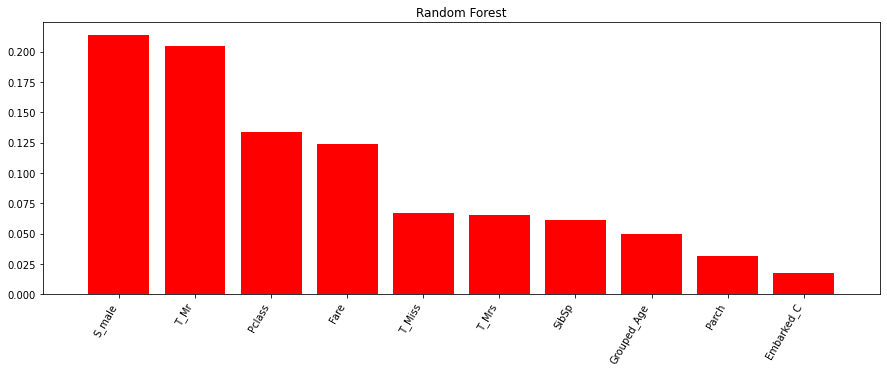

In [ ]:
print('Random Forest accuracy:',accuracy_score(Y_test, RF.predict(X_test)))
plot_keyFeat_trees(RF, X_names, 'Random Forest', top_features=10)

### 4. Support Vector Machine with RBF kernel 

In [ ]:
svc = SVC()
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200,1000]}               

print("# Tuning hyper-parameters")
cv_svc = GridSearchCV(SVC(),svc_param_grid, cv=5, n_jobs= -1, verbose = 1)
cv_svc.fit(X_train, Y_train)


cv_svc.best_params_


# Tuning hyper-parameters
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.7s finished


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svc= SVC(kernel='rbf',C=1000,gamma=0.001).fit(X_train,Y_train)
y_pred = svc.predict(X_test)

# Evaluate accuracy
print('Support vector machine accuracy:',accuracy_score(Y_test, y_pred))

Support vector machine accuracy: 0.7607655502392344


# Results

| Model                       | Accuracy | 
|-----------------------------|----------|
| Naïve Bayes Classifier      |	0.754    |
| Logistic Regression (L2)    | 0.778    |
| Classification Decision Tree|	0.756    |
| Random Forest               | 0.780    |
| Support Vector Machine      |	0.761    |
   

The best machine learning model that can be used to predict the survival of passengers on the Titanic is Random Forest with the number of trees specified as 100 and maximum depth of 5 for each tree. The feature importance for the Random Forest model is visualised above to interpret the model better. 
   
   In the Figure, it is shown that the top 4 important features is the Sex of the passenger where 1 is for male and 0 as female(S_male) , Title of the person if he is called Mr (T_Mr), the passenger class (Pclass)  and the ticket fare paid by passenger (Fare). 